## * What is Data Science?
  - Intersection of CS/IT + Maths/Stats + Domain/Business Knowledge
  - togethre its data science

##* What is Analytics?
  - Descriptive (ANOVA)
  - Predictive (LR)
  - Prescriptive (LPP)

## * What is AI?
  - include => learning + reasoning + self correction + simulation
  - E.g. driver less cars
  * What can it do? 
    - Answer info
    - watch health
    - deliver groceries
    - breakthrough genomics
  * what it cannot do?
    - human level general intelligence

## * What is ML?
  - in 1959 Arthur Samuel defined it as "Field of study that gives computers the ability to learn without being explicitly programmed”
  - it can be called as "the effort to automate intellectual tasks normally performed by humans"
  - in classical programming we input Rules+Data to get Answers while in ML programming we input Data+Answers to get Rules    

## * Where is ML used? 
  - Medicine
  - National Security
  - from a list of customers which will respond?
  - which customers are likely to commit fraud?

## * Role of ML
  - to aid to achieve AI
  - driven by maths concepts
  - analyse patterns in captured data to build predictive model on existing phenomena in business
  - broadly there are 3 types of ML algorithms
    1. Supervised 
    2. Unsupervised 
    3. Re-inforcement 

## Types of ML
1. Supervised
2. Unsupervised

## Supervised
* when the response variable is numerical, then the predictive modeling is called regression
* when the response variable is categorical, the model is called classification 

  ### * Example of Regression:
    * Sales are influenced by variables like adv expenses, costs, dealers cost etc.
        
        Sales = function(Adv. Exp, Manpower, Cost, Dealers...)

  ### * Example of Classification: 
    * Customer may buy/not buy, patient may die/not die

        Prob(Cust Purchase) = function(Age, Income, Residence...)

        Prob(Cust defaults) = function(Expense, Taxes, Charges...)

  ### * Algorithms of Supervised Learning:

    1. Linear Regression
    2. Regression Trees
    3. Non-Linear Regression
    4. Bayesian Linear Regression
    5. Polynomial Regression

## UnSupervised
* there is no outcome or y 

  ### * Algorithms of Unsupervised Learning:
    1. Clustering
    2. PCA
    3. Association Rules

## Lifecycle of any ML project
1. Define the scope
2. Collect/ Extract the Data
3. Train an appropriate ML Model and Evaluate it
4. Deploy the Model
5. Collect feedback and backtrack with new inputs to make changes to Model and re-Deploy

## Types of predicted values
  * ### categorical
   * we use classiication confusion matrix
  * ### numerical 
   * we use algorithms




In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


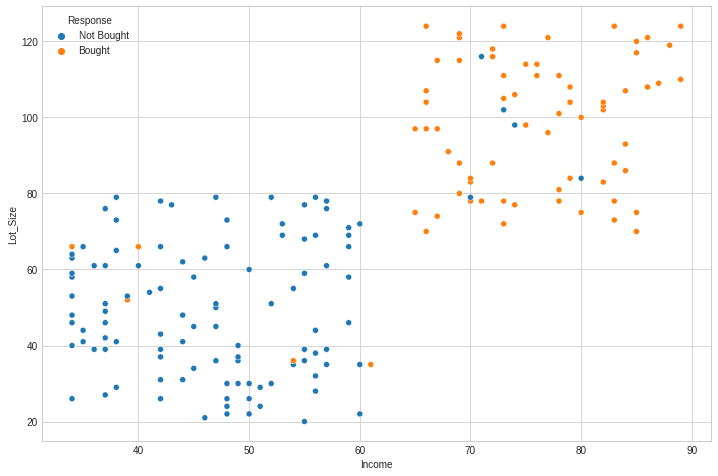

In [8]:
mowers_path = '/content/gdrive/MyDrive/Datasets/RidingMowers.csv'
mowers = pd.read_csv(mowers_path)
with plt.style.context('seaborn-whitegrid'):
  fig_size = plt.rcParams["figure.figsize"]
  fig_size[0] = 12 # X scaling of fig 
  fig_size[1] = 8 # Y scaling of fig
  sns.scatterplot(data = mowers, x = 'Income', y = 'Lot_Size', hue = 'Response')
  plt.show()

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, r2_score, f1_score, accuracy_score, classification_report
# create dummy
# train test split
# go for knn
# test and conclude
dum_mow =pd.get_dummies(mowers,drop_first=True)

X = dum_mow.drop('Response_Not Bought',axis=1)
y= dum_mow['Response_Not Bought']
X_train,X_test,y_train,y_test= train_test_split(X,y,stratify=y,random_state=2022,train_size=0.7)

knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

y_pred= knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[22  0]
 [ 1 32]]
0.9818181818181818
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.97      0.98        33

    accuracy                           0.98        55
   macro avg       0.98      0.98      0.98        55
weighted avg       0.98      0.98      0.98        55



In [25]:
#loop
acc=[]
ks = [x for x in range(1,16) if x%2!=0]
for i in ks:
  knn =KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  acc.append(accuracy_score(y_test,y_pred))

i_max =np.argmax(acc)
best_k =ks[i_max]
print("Best n_neigbors =",best_k)

Best n_neigbors = 3


# Functions:
  - roc_auc : helps to draw ROC curve
  - roc_auc_score : calculates area under the curve 

In [32]:
from sklearn.metrics import roc_auc_score

acc=[]
ks = [x for x in range(1,16) if x%2!=0]
for i in ks:
  knn =KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred_prob = knn.predict_proba(X_test)[:,1]
  acc.append(roc_auc_score(y_test,y_pred_prob))

i_max =np.argmax(acc)
best_k =ks[i_max]
print("Best n_neigbors =",best_k)


Best n_neigbors = 3


In [42]:
from sklearn.metrics import log_loss
acc=[]
ks = [x for x in range(1,16) if x%2!=0]
for i in ks:
  knn =KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred_prob = knn.predict_proba(X_test)[:,1]
  acc.append(-log_loss(y_test,y_pred_prob))

i_max = np.argmax(acc)
best_k =ks[i_max]
print("best n_neigbors =",best_k)

best n_neigbors = 15


In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
boston_path = '/content/gdrive/MyDrive/Datasets/Boston.csv'
boston = pd.read_csv(boston_path)
X= boston.drop('medv',axis=1)
y= boston['medv']

X_train, X_test,y_train,y_test= train_test_split(X,y,random_state=2022,train_size=0.7)
acc=[]
ks =np.arange(1,16)
for i in ks:
  knn= KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train,y_train)

  y_pred =knn.predict(X_test)
  acc.append(-mean_squared_error(y_test,y_pred))
i_max =np.argmax(acc)
best_k =ks[i_max]
print("Best n_neighbors =",best_k)
print("Best score =",acc[i_max])


Best n_neighbors = 9
Best score = -39.11516325536063


In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
boston_path = '/content/gdrive/MyDrive/Datasets/Boston.csv'
boston = pd.read_csv(boston_path)
X= boston.drop('medv',axis=1)
y= boston['medv']

X_train, X_test,y_train,y_test= train_test_split(X,y,random_state=2022,train_size=0.7)
acc=[]
ks =np.arange(1,16)
for i in ks:
  knn= KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train,y_train)

  y_pred =knn.predict(X_test)
  acc.append(r2_score(y_test,y_pred))
i_max =np.argmax(acc)
best_k =ks[i_max]
print("Best n_neighbors =",best_k)
print("Best score =",acc[i_max])


Best n_neighbors = 9
Best score = 0.5433824716755711


In [58]:
scaler = StandardScaler()
scaler.fit(X_train)
X_trn_scl =scaler.transform(X_train)
X_tst_scl =scaler.transform(X_test)
acc=[]
ks =np.arange(1,16)
for i in ks:
  knn= KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_trn_scl,y_train)
  y_pred =knn.predict(X_tst_scl)
  acc.append(r2_score(y_test,y_pred))

i_max =np.argmax(acc)
best_k =ks[i_max]
print("Best n_neighbors =",best_k)
print("Best score =",acc[i_max])


Best n_neighbors = 4
Best score = 0.8398330163891028


In [62]:
# without scaling
concrete_path = '/content/gdrive/MyDrive/Datasets/Concrete_Data.csv'
concrete = pd.read_csv(concrete_path)
X= concrete.drop('Strength',axis=1)
y= concrete['Strength']

X_train, X_test,y_train,y_test= train_test_split(X,y,random_state=2022,train_size=0.7)
acc=[]
ks =np.arange(1,16)
for i in ks:
  knn= KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred =knn.predict(X_test)
  acc.append(r2_score(y_test,y_pred))

i_max =np.argmax(acc)
best_k =ks[i_max]
print("Best n_neighbors =",best_k)
print("Best score =",acc[i_max])


Best n_neighbors = 2
Best score = 0.712527052078325


In [63]:
# with scaling
concrete_path = '/content/gdrive/MyDrive/Datasets/Concrete_Data.csv'
concrete = pd.read_csv(concrete_path)
X= concrete.drop('Strength',axis=1)
y= concrete['Strength']

X_train, X_test,y_train,y_test= train_test_split(X,y,random_state=2022,train_size=0.7)
scaler = StandardScaler()
scaler.fit(X_train)
X_trn_scl =scaler.transform(X_train)
X_tst_scl =scaler.transform(X_test)
acc=[]
ks =np.arange(1,16)
for i in ks:
  knn= KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_trn_scl,y_train)
  y_pred =knn.predict(X_tst_scl)
  acc.append(r2_score(y_test,y_pred))

i_max =np.argmax(acc)
best_k =ks[i_max]
print("Best n_neighbors =",best_k)
print("Best score =",acc[i_max])

Best n_neighbors = 4
Best score = 0.7273783938643456


In [68]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

mowers_path = '/content/gdrive/MyDrive/Datasets/RidingMowers.csv'
mowers = pd.read_csv(mowers_path)

dum_mow =pd.get_dummies(mowers,drop_first=True)
X= dum_mow.drop('Response_Not Bought',axis=1)
y =dum_mow['Response_Not Bought']

knn = KNeighborsClassifier(n_neighbors=3)
kfold = StratifiedKFold(n_splits=5, shuffle=True,random_state=2022)

#accuracy
cross_val_score(knn,X,y,cv =kfold)

#roc auc
result = cross_val_score(knn,X,y,cv=kfold,scoring='roc_auc')
print(result.mean())


0.9353391053391054


In [79]:
acc=[]
kfold = StratifiedKFold(n_splits=5, shuffle=True,random_state=2022)
ks=[x for x in range(1,16) if x%2!=0]
for i in ks:
  knn = KNeighborsClassifier(n_neighbors=i)
  result = cross_val_score(knn,X,y,cv=kfold,scoring='roc_auc')
  acc.append(result.mean())

i_max =np.argmax(acc)
best_k =ks[i_max]
print("Best n_neighbors =",best_k)
print("Best Cross Validation Score =",acc[i_max])

Best n_neighbors = 7
Best Cross Validation Score = 0.9387373737373738


In [85]:
# Grid Search Cross Validation is even better for complicated algorithms without using the loop method
from sklearn.model_selection import GridSearchCV
ks= np.arange(1,16,2)
parameters = {'n_neighbors':ks}
knn=KNeighborsClassifier()
gcv =GridSearchCV(knn,param_grid=parameters,scoring ='roc_auc',cv=kfold)
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)


{'n_neighbors': 7}
0.9387373737373738


In [88]:
# kfold
# KNeighborsRegressor
# r2_score
# boston 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold


boston_path = '/content/gdrive/MyDrive/Datasets/Boston.csv'
boston = pd.read_csv(boston_path)
X= boston.drop('medv',axis=1)
y= boston['medv']


kfold = KFold(n_splits=5, shuffle=True,random_state=2022)
ks= np.arange(1,16)
parameters = {'n_neighbors':ks}
knn=KNeighborsRegressor()

gcv =GridSearchCV(knn,param_grid=parameters,scoring ='r2',cv=kfold)
gcv.fit(X,y)


print(gcv.best_params_)
print(gcv.best_score_)

{'n_neighbors': 4}
0.5460972244133464
